<a href="https://colab.research.google.com/github/forfourr/DL_test/blob/main/Keras_ex_03_BostonHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 보스턴 주택 가격 데이터 셋

- 보스턴 지역 범죄율, 지방세율등의 데이터가 주택 가격의 값에 미치는 영향 확인


In [ ]:
#import data

from keras.datasets import boston_housing
(train_data, train_labels),(test_data, test_labels) = boston_housing.load_data()

In [ ]:
print(train_data.shape)
print(test_data.shape)

### Data processing - standard scaling

In [ ]:
#mean 평균
#mean = train_data.mean()    #전체평균

#열(col)별로 평균 구하기
mean = train_data.mean(axis=0)

#원래 값 - 평균 값
train_data -=mean

#표준편차 구함
std= train_data.std(axis=0)
train_data/= std

### Model

In [ ]:
# 모델의 구성 
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mse'])
  return model

### K-fold

- data가 아주 작을 때

In [ ]:
# K-folder 검증을 사용한 훈련 검증 

import numpy as np 

k = 4                                   # folder 개수
num_val_samples = len(train_data) // k  # 한 folder의 데이터 수
all_scores = []

for i in range(k):
    print('processing fold #',i)

    #Validation data
    val_data = train_data[i * num_val_samples:(i+1) * num_val_samples]      #start point:end point 0:101, 101:202 ...
    val_labels = train_labels[i * num_val_samples:(i+1) * num_val_samples]

    #Training data
    data1 = train_data[:i*num_val_samples]
    data2 = train_data[(i+1)*num_val_samples:]
    partial_train_data = np.concatenate([data1,data2], axis=0)         #data1,dat2를 합쳐줌(꼭 데이터타입 같아야)

    #label도 같은 작업 해줌
    data1_labels = train_labels[:i*num_val_samples]
    data2_labels = train_labels[(i+1)*num_val_samples:]
    partial_train_labels = np.concatenate([data1_labels,data2_labels], axis=0)  

    #model Training
    model = build_model()
    model.summary()
    model.fit(partial_train_data,
              partial_train_labels,
              epochs=100,
              batch_size=128,
              verbose=0)
    
    #model validate
    val_mse, val_mae = model.evaluate(val_data, val_labels)
    print(val_mse, val_mae)
    all_scores.append(val_mae)


num_val_samples = 101



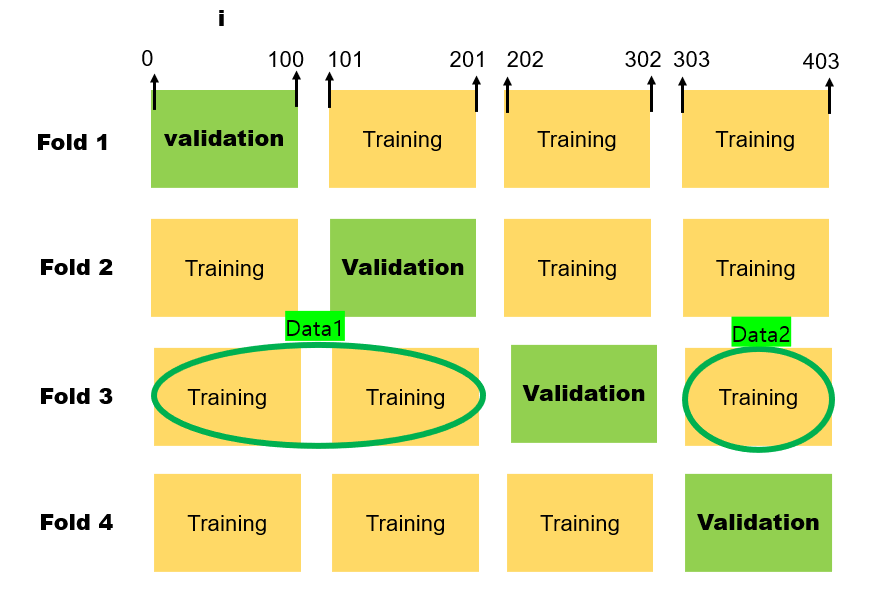

In [ ]:
np.mean(all_scores)